# Лабораторная работа №2

#### Методы оценки статических характеристик, связанных с распределением пользователей на плоскости

### Задание №1:

In [803]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gaussian_kde
import seaborn as sns

#### Задание №1.1:

Создаём функцию для генерации распределения (использую DataFrame для удобства чтения)

In [804]:
def distribution(size):
  temp = {
    "exponential": np.random.exponential(1, size=size),
    "normal": np.random.normal(0, 1, size=size)
  }
  df = pd.DataFrame(temp)
  return df

Создаём распределения

In [805]:
dist_100 = distribution(100)
dist_1000 = distribution(1000)

In [806]:
print(dist_100.mean()) # Вывод матожидания для выборки из 100 чисел

exponential    0.894852
normal        -0.035770
dtype: float64


In [807]:
print(dist_100.var()) # Вывод дисперсии для выборки из 100 чисел

exponential    0.698354
normal         0.810713
dtype: float64


In [808]:
print(dist_1000.mean()) # Вывод матожидания для выборки из 1000 чисел

exponential    1.018968
normal         0.008605
dtype: float64


In [809]:
print(dist_1000.var()) # Вывод дисперсии для выборки из 1000 чисел

exponential    0.959914
normal         0.980200
dtype: float64


Объединяем матожидания и дисперсии для ранее заданных выборок и распределений в единый датафрейм и добавляем теоретические значения

In [810]:
distribution_table = {
  '100': [
    dist_100['exponential'].mean(), 
    dist_100['exponential'].var(),
    dist_100['normal'].mean(), 
    dist_100['normal'].var(),
  ],
  '1000': [
    dist_1000['exponential'].mean(), 
    dist_1000['exponential'].var(),
    dist_1000['normal'].mean(), 
    dist_1000['normal'].var(),
  ],
  'Theory value': [
    1, 1, 0, 1
  ]
}

index_labels = ['Mean exp', 'Var exp', 'Mean normal', 'Var normal']

distribution_table = pd.DataFrame(distribution_table, index=index_labels)
distribution_table


,100,1000,Theory value
Mean exp,0.894852,1.018968,1
Var exp,0.698354,0.959914,1
Mean normal,-0.035770,0.008605,0
Var normal,0.810713,0.980200,1


#### Задание №1.2:

Создаём единый датафрейм и добавляем туда квантили со значениями в соответствии с заданием, а также добавляем теоретические значения в соответствии с таблицами значений распределений

In [811]:
quantile_table = {
  '100': [
    dist_100['exponential'].quantile(q=.5), 
    dist_100['exponential'].quantile(q=.99),
    dist_100['normal'].quantile(q=.5),  
    dist_100['normal'].quantile(q=.99) 
  ],
  '1000': [
    dist_1000['exponential'].quantile(q=.5), 
    dist_1000['exponential'].quantile(q=.99),
    dist_1000['normal'].quantile(q=.5),  
    dist_1000['normal'].quantile(q=.99) 
  ],
  'Theory value': [
    0.6915, 4.6052, 0, 2.326
  ]
}

index_labels = ['0.5 quantile for exponential', '0.99 quantile for exponential', '0.5 quantile for normal', '0.99 quantile for normal']

quantile_table = pd.DataFrame(quantile_table, index=index_labels)
quantile_table

,100,1000,Theory value
0.5 quantile for exponential,0.652789,0.714837,0.6915
0.99 quantile for exponential,4.065920,4.371510,4.6052
0.5 quantile for normal,-0.110810,-0.001616,0.0000
0.99 quantile for normal,1.907946,2.338933,2.3260


#### Задание №1.3:

Визуализируем распределения используя гистограммы

In [812]:
def hist_plot(prop):
  labels = ['exponential', 'normal']
  colors = ['red', 'green']

  plt.figure(dpi=80)
  plt.hist(prop, label=labels, color=colors)
  plt.legend(prop={'size': 10})
  plt.title(f"Гистограмма для {prop.size//2}")

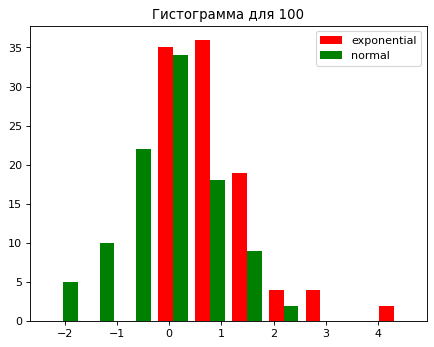

In [813]:
hist_plot(dist_100)

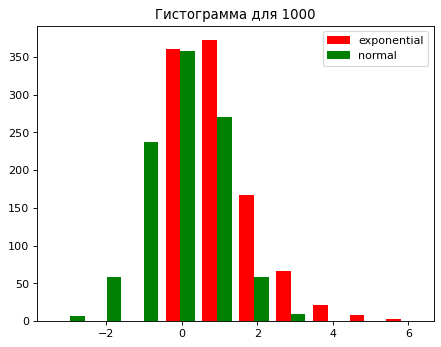

In [814]:
hist_plot(dist_1000)

#### Задание №1.4:

Создаём функцию для распределения случайной величины на основе выборки

In [815]:
def exp_distribution(lambd, x):
  return 1 - np.exp(-lambd*x)

Описываем точки для последующей визализации

In [816]:
t_exp_x = np.linspace(0, 10, 100)
t_exp_y = exp_distribution(1, t_exp_x)

Сортируем выборки

In [817]:
exp_100 = np.array(dist_100['exponential'])
exp_1000 = np.array(dist_1000['exponential'])

exp_100.sort()
exp_1000.sort()

Равномерно распределяем точки

In [818]:
exp_100_y = np.arange(0., 1., .01)
exp_1000_y = np.arange(0., 1., .001)

Отрисовываем выборки и теоретическую кривую на одном графике

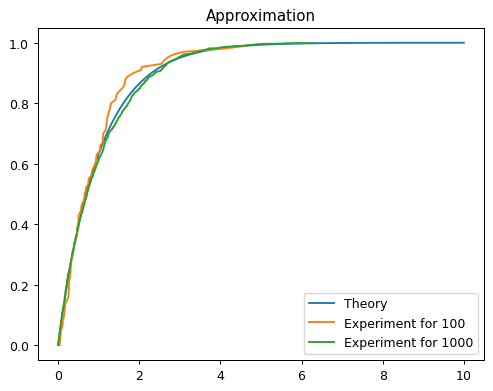

In [819]:
plt.figure(dpi=90)
plt.title('Approximation')
plt.plot(t_exp_x, t_exp_y, label='Theory')
plt.plot(exp_100, exp_100_y, label='Experiment for 100')
plt.plot(exp_1000, exp_1000_y, label='Experiment for 1000')
plt.legend()
plt.show()

#### Задание №1.5:

Создаём теоретическую кривую

In [820]:
def exp_distribution(lambd, x):
  return 1 - np.exp(-lambd*x)

Создаём плотность распределения случайной величины на основе выборки

In [821]:
def exp_density(lambd, x):
  return lambd*np.exp(-lambd*x)

Создаём точки для последующей визуализации

In [822]:
t_exp_density_x = np.linspace(0, 10, 100)
t_exp_density_y = exp_density(1, t_exp_density_x)

In [823]:
exp_density_100 = np.array(dist_100['exponential'])
exp_density_1000 = np.array(dist_1000['exponential'])

In [824]:
kde_100 = gaussian_kde(exp_density_100)
kde_1000 = gaussian_kde(exp_density_1000)

Визуализируем плотность и теоретическую кривую плотности распределения на одном графике

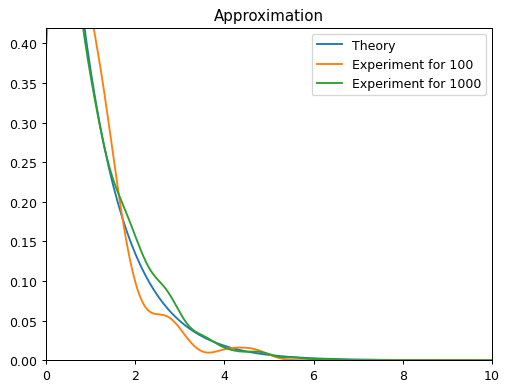

In [825]:
plt.figure(dpi=90)
plt.title('Approximation')
plt.plot(t_exp_density_x, t_exp_density_y, label='Theory')
plt.plot(np.linspace(0, 10, 1000), kde_100(np.linspace(0, 10, 1000)), label='Experiment for 100')
plt.plot(np.linspace(0, 10, 1000), kde_1000(np.linspace(0, 10, 1000)), label='Experiment for 1000')
plt.xlim(0, 10)
plt.ylim(0, 0.42)
plt.legend()
plt.show()

#### **Вывод:** при наглядном анализе выборок на графиках можно сделать вывод, что точность аппроксимвции прямопропорционально зависит от количества экспериментов, соответственно, при увеличении количества экспериментальных значений, будет повышаться точность аппроксимации

### Задание №2:

Создаём функции по расчёту дистанции

In [826]:
def distance(x1, y1, x2, y2):
  return np.sqrt((x2-x1)**2+(y2-y1)**2)

In [827]:
def distance_line(number):
  a=10
  b=30
  distances=[]
  for i in range(number):
    x1=np.random.uniform(0, a)
    y1=np.random.uniform(0, b)

    x2=np.random.uniform(0, a)
    y2=np.random.uniform(0, b)

    distances.append(distance(x1, y1, x2, y2))

  distances.sort()
  return np.array(distances)

Рассчитываем дистанции для выборок разного размера

In [828]:
distance_100 = distance_line(100)
distance_1000 = distance_line(1000)
distance_10000 = distance_line(10000)

Делаем расчёт среднего рассточния для всех выборок и выводим их в формате таблицы

In [829]:
average_100 = np.mean(distance_100)
average_1000 = np.mean(distance_1000)
average_10000 = np.mean(distance_10000)

average_distance = {
  "100": average_100,
  "1000": average_1000,
  "10000": average_10000,
}

average_distance = pd.DataFrame(average_distance, index=["Average"])

average_distance

,100,1000,10000
Average,10.612759,11.11591,11.056772


Реализуем функцию распределения вероятностей и плотности вероятностей случайных расстояний

In [830]:
def plot_distribution(distances, label, color):
    sns.histplot(distances, bins=30, stat="density", label=f'Distribution for {label}', color=color, alpha=0.5)

    kde = gaussian_kde(distances)
    x = np.linspace(0, max(distances), 1000)
    plt.plot(x, kde(x), label=f'Density for {label}', color=color, linestyle='--')

Визуализируем разницу между соответствующими функциями на одном графике

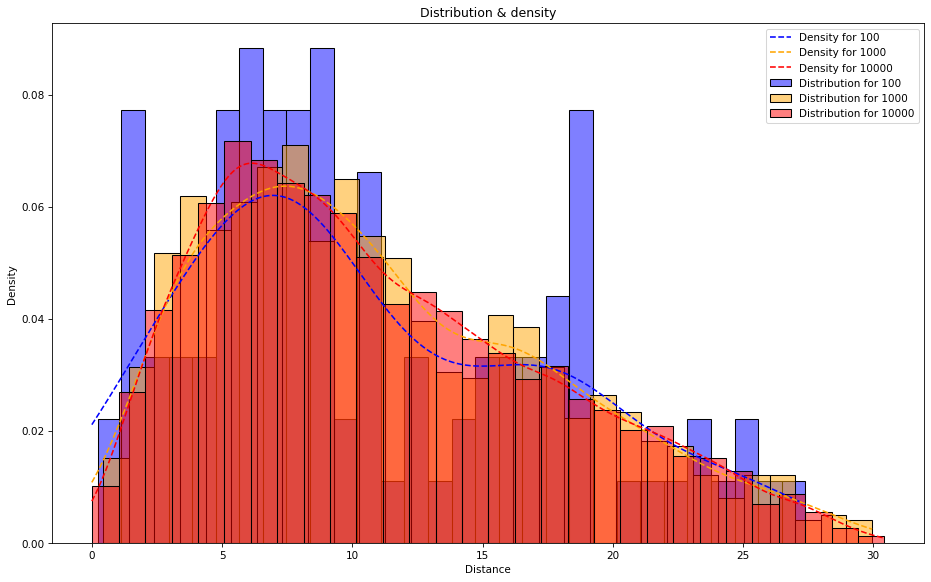

In [831]:
plt.figure(figsize=(15, 9), dpi=75)

plot_distribution(distance_100, '100', color='blue')
plot_distribution(distance_1000, '1000', color='orange')
plot_distribution(distance_10000, '10000', color='red')

plt.title('Distribution & density')
plt.xlabel('Distance')
plt.ylabel('Density')
plt.legend()
plt.show()